# WstA_p do eksploracji danych w Pythonie

Ten notatnik pomoLze Ci zapoznaA_ siA_ z postawowymi elementami eksploracji danych w Pythonie. Po uzupeL_nieniu tego notatnika powinieneL_:

+ znaA_ nazwy podstawowych bibliotek do eksploracji i wizualizacji danych,
+ umieA_ wczytaA_ zbiAlr danych,
+ wiedzieA_ jak wykonaA_ podstawowe operacje na data frame'ie
+ umieA_ nauczyA_ i przetestowaA_ klasyfikator
+ wiedzieA_ jak wykonaA_ prosty wykres

## Biblioteki

OprAlcz podstawowych elementAlw jA_zyka, do eksploracji danych wykorzystamy klika bibliotek. Podstawowe biblioteki, ktAlre bA_dA_ nam potrzebne to: `matplotlib`, `pandas`, `numpy` i `sklearn`. CzA_L_A_ z potrzebnych moduL_Alw zaL_adowaL_em juLz poniLzej: 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, auc, roc_auc_score

**Zad. 3: ZaL_aduj jeszcze dwie biblioteki: pandas z aliasem pd i numpy z aliasem np.**

In [2]:
import numpy as np
import pandas as pd

## Pandas

NajwyLzszy czas wczytaA_ jakiL_ zbiAlr danych. W tym celu wykorzystamy bibliotekA_, ktAlrA_ wL_aL_nie zaimportowaL_eL_: pandas. Upewnij siA_, Lze L_ciagniA_ty zbiAlr danych znajduje siA_ w tym samym folderze co notatnik i podA_Lzaj za komentarzami.

**Zad. 4: Wczytaj zbiAlr titanic do zmiennej `df`.**

In [3]:
# skorzystaj z metody read_csv w module pandas
# poniewaLz nadalismy temu moduL_owi alias, musisz wywoL_aA_
# pd.read_csv()
# wyszukaj w Internecie jakie parametry przyjmuje ta funkcja
# wynik wywoL_ania przypisz do zmiennej df

# df = pd.read_csv("titanic_data.csv", sep=',', index_col=0)
df = pd.read_csv("titanic_data.csv", sep=',')

JeL_li wszystko poszL_o dobrze, to zobaczmy jak wyglA_da pierwsze 10 wierszy zbioru (funkcjA_ o takiej samej nazwie znasz z R).

**Zad. 5: WyL_wietl pierwsze 10 wierszy zbioru.**

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Teraz zrobimy coL_ trochA_ trudniejszego - odfiltrujemy wybrane kolumny. Warto zajrzeA_ na http://pandas.pydata.org/pandas-docs/stable/10min.html, Lzeby zapoznaA_ siA_ z podstawowymi operacjami w pandas.

**Zad. 6: UsuL_ kolumny PassengerId, Name, Ticket, Cabin. Wynik przypisz do zmiennej `df_filtered`. WyL_wietl pierwsze 10 wierszy, Lzeby upewniA_ siA_ Lze operacja siA_ udaL_a.**

In [5]:
df_filtered = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df_filtered.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Zanim bA_dziemy mogli wykorzystaA_ jakikolwiek algorytm uczenia maszynowego z scikit-learn, musimy zrobiA_ dwie rzeczy:
- uzupeL_niA_ (lub usunA_A_) brakujA_ce wartoL_ci
- zamieniA_ wszystkie atrybuty na liczby

PoniewaLz dopiero zaczynamy pracA_ z pandas, wyeliminujemy wartoL_ci brakujA_ce w najprostszy mozliwy sposAlb - usuniemy wiersze z wartoL_ciami pustymi

**Zad. 7: UsuL_ wiersze z brakujA_cymi wartoL_ciami i przypisz wynikowego data fame'a do `df_complete`. WyL_wietl pierwsze 10 wierszy i sprawdLs czy zniknA_L_ piA_ty przykL_ad.**

In [6]:
df_complete = df_filtered.dropna()
df_complete.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


**Zad. 8: ZamieL_ Sex i Embarked na kolumny liczbowe.**

In [7]:
# tu trochA_ pomogA_...
# musimy zamieniA_ (sL_owo klucz) wartoL_ci tekstowe na liczby
# zrAlb coL_ takiego dla kolumny Sex (zignoruj ostrzeLzenie):

df_complete.loc[:, "Sex"].replace({"female": 0, "male": 1}, inplace=True)

# jeL_li to siA_ uda - wymyL_l coL_ podobnego dla kolumny Embarked
# print(df_complete["Embarked"].unique())
df_complete.loc[:, "Embarked"].replace({"C": 0, "S": 1, "Q": 2}, inplace=True)

df_complete.head(10)

C:\Users\festo\AppData\Local\Temp\ipykernel_11140\2469648782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.loc[:, "Sex"].replace({"female": 0, "male": 1}, inplace=True)
C:\Users\festo\AppData\Local\Temp\ipykernel_11140\2469648782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.loc[:, "Embarked"].replace({"C": 0, "S": 1, "Q": 2}, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
6,0,1,1,54.0,0,0,51.8625,1
7,0,3,1,2.0,3,1,21.0750,1
8,1,3,0,27.0,0,2,11.1333,1
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,1


Pandas (i numpy na ktAlrym bazuje) potrafi duLzo, duLzo wiA_cej, ale na tA_ chwilA_ to co zrobiliL_my nam wystarczy.

## Scikit-learn

Czas przejL_A_ do uczenia maszynowego. KorzystajA_c z [dokumentacji scikit-learn](http://scikit-learn.org/stable/) oraz slajdAlw do zajA_A_, sprAlbuj wykonaA_ kolejne zadania. Polecam teLz [tutoriale Kevina Markhama](http://blog.kaggle.com/author/kevin-markham/).

**Zad. 9: KorzystajA_c z scikit-learn podziel `df_complete` na zbiAlr uczA_cy i testowy, kolejno w proporcjach 60%-40%.**

In [8]:
# to nie jest takie trudne, bo juLz zaimportowaliL_my odpowiedniA_ funkcjA_ (spAljrz na importy)
# doczytaj tylko co zwraca funkcja, ktAlrej uLzyjesz - scikit ma trochA_ inne podejL_cie do zbiorAlw danych niLz np. caret
# postaraj siA_, aby ten losowy podziaL_ byL_ powtarzalny...
# UWAGA: chcemy przewidywaA_ wartoL_A_ zmiennej Survived
X = df_complete.drop("Survived", axis=1)
y = df_complete["Survived"]

# print(X.head())
# print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=False)

**Zad. 10: KorzystajA_c ze zbioru treningowego zoptymalizuj parametry klasyfikatora RandomForestClassifier. ULzyj oceny krzyLzowej z miarA_ AUC.**


In [9]:
from sklearn.ensemble import RandomForestClassifier

# spAljrz na slajdy do zajA_A_, znajdujA_ce siA_ tam fragmenty kodu powinny CiA_ naprowadziA_ na rozwiA_zanie
# uwaLzaj... bA_dziesz musiaL_ zaimportowaA_ dodatkowA_ bibliotekA_
# upewnij siA_ teLz, Lze TwAlj eksperyment jest powtarzalny...

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'random_state': [0]}

clf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring=auc)
clf.fit(X_train, y_train)
print(clf.best_params_)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: auc() takes 2 positional arguments but 3 were given

  warnings.warn(
c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_validation.py", li

{'max_depth': 3, 'min_samples_split': 2, 'random_state': 0}
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       169
           1       0.81      0.59      0.69       116

    accuracy                           0.78       285
   macro avg       0.79      0.75      0.76       285
weighted avg       0.78      0.78      0.77       285



c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: auc() takes 2 positional arguments but 3 were given

  warnings.warn(
c:\users\festo\onedrive - put.poznan.pl\semestr ix\emd\emd-python\venv\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


**Zad. 11: OceL_ uzyskany model na zbiorze testowym.**

In [10]:
best_clf = RandomForestClassifier(**clf.best_params_).fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7500765149969394

JeL_li dotarL_eL_ do tego momentu, to gratulacje d___

## Seaborn

Lteby coL_ narysowaA_ w Pythonie najczA_L_ciej korzysta siA_ z biblioteki matplotlib i jakichL_ nakL_adek na tA_ bibliotekA_. Matplotlib jest bibliotekA_ wzglA_dnie niskopoziomowA_, ktAlra mogL_aby zostaA_ porAlwnana do podstawowego mechanizmu rysowania w R (tzw. *base plotting system*). Za pomocA_ matplotliba da siA_ narysowaA_ prawie wszystko, z nakL_adkami jest juLz gorzej i dlatego czA_sto miesza siA_ wykorzystanie rAlLznych bibliotek.

SprAlbujmy coL_ narysowaA_, Lzeby zakoL_czyA_ raport obrazkiem. Wykorzystamy w tym celu bibliotekA_ [seaborn](http://seaborn.pydata.org/index.html). JeL_li nie masz jej zainstalowanej musisz otworzyA_ terminal Anacondy (*Anaconda Prompt*) i wpisaA_ `conda install seaborn`.

In [11]:
# najpierw odrobina magii
# jeL_li chcemy Lzeby wykresy rysowaL_y nam siA_ w raporcie to musimy wykonaA_ instrukcjA_
# % matplotlib inline <- !UWAGA! Linia zakomentowana ze względu na wykorzystywane IDE

In [12]:
# dodatkowo zaimportujmy przydatne biblioteki i ustawmy domyL_lny styl wykresAlw
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**Zad. 12: Skorzystaj z `violinplot` Lzeby porAlwnaA_ ceny biletAlw (Fare) dla rAlLznych klas (Pclass). Jako palety kolorAlw uLzyj jednej z palet z [ColorBrewera](http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=3)**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

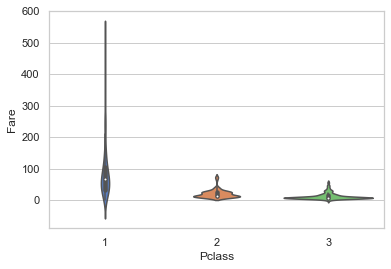

In [13]:
# użyto innej palety kolorow, poniewaz proponowana nie podaje wartosci w hue
sns.violinplot(x=df_complete["Pclass"], y=df_complete["Fare"], palette="muted")

## Plotnine

SprawdLs co pamiA_tasz z ggplota! Narysuj wykres przeLzywalnoL_ci mA_Lzczyzn i kobiet (`Sex`) z podziaL_em na typy biletAlw (`Pclass`)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

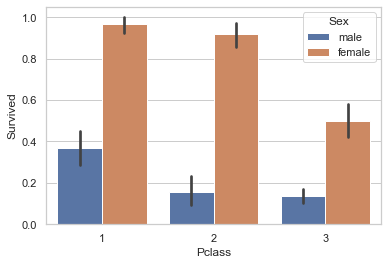

In [14]:
sns.barplot(y="Survived", x="Pclass", hue="Sex", data=df)